# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [261]:
%matplotlib inline
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [262]:
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

In [263]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Data structure

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In [265]:
cat_vars = [
    "gender", 
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exhappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr4_s",
    "sinc4_s",
    "intel4_s",
    "fun4_s",
    "amb4_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]

In [266]:
df[cat_vars]=df[cat_vars].astype("category",copy=False)
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In [267]:
variables = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob','like','age']
df = df[variables]

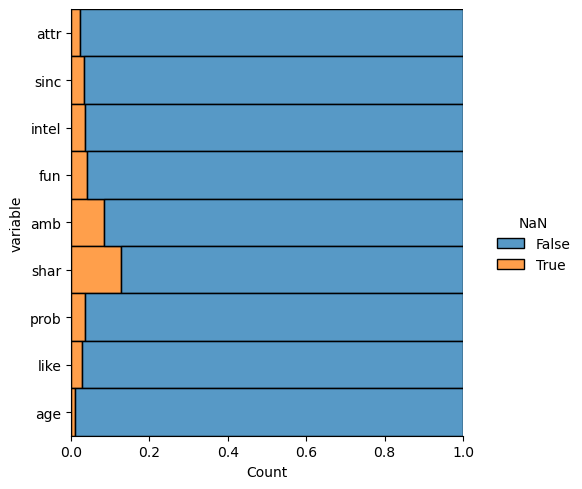

In [268]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

Drop NAs

In [269]:
df.isna().sum()

attr      202
sinc      277
intel     296
fun       350
amb       712
shar     1067
prob      309
like      240
age        95
dtype: int64

In [270]:
df

,attr,sinc,intel,fun,amb,shar,prob,like,age
0,6.0,9.0,7.0,7.0,6.0,5.0,6.0,7.0,21.0
1,7.0,8.0,7.0,8.0,5.0,6.0,5.0,7.0,21.0
2,5.0,8.0,9.0,8.0,5.0,7.0,NaN,7.0,21.0
3,7.0,6.0,8.0,7.0,6.0,8.0,6.0,7.0,21.0
4,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,21.0
...,...,...,...,...,...,...,...,...,...
8373,3.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,25.0
8374,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,25.0
8375,4.0,7.0,8.0,8.0,8.0,NaN,5.0,6.0,25.0
8376,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,25.0


In [271]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

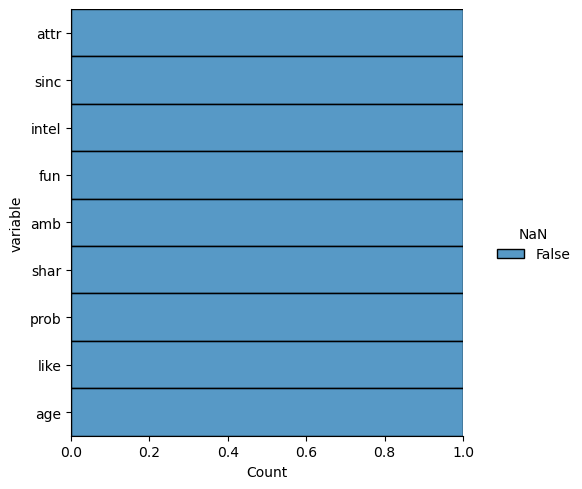

In [272]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

### Variable lists

In [273]:
y_label = 'like'
features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob']

X = df[features]
y = df[y_label]

### Data splitting

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics

In [275]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attr,6885.0,6.190182,1.949666,0.0,5.0,6.0,8.0,10.0
sinc,6885.0,7.157734,1.743865,0.0,6.0,7.0,8.0,10.0
intel,6885.0,7.350908,1.555328,0.0,6.0,7.0,8.0,10.0
fun,6885.0,6.393900,1.951725,0.0,5.0,7.0,8.0,10.0
amb,6885.0,6.753740,1.795497,0.0,6.0,7.0,8.0,10.0
shar,6885.0,5.456282,2.142641,0.0,4.0,6.0,7.0,10.0
prob,6885.0,5.246405,2.141773,0.0,4.0,5.0,7.0,10.0
like,6885.0,6.129368,1.847897,0.0,5.0,6.0,7.0,10.0
age,6885.0,26.226144,3.455303,18.0,24.0,26.0,28.0,55.0


### Exploratory data analysis

In [276]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

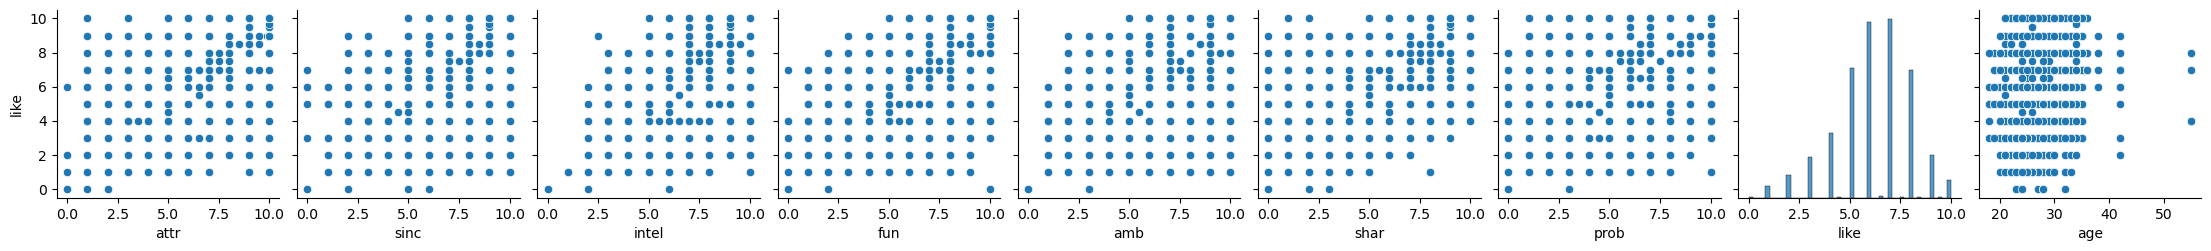

In [277]:
sns.pairplot(df, y_vars='like')

<AxesSubplot: >

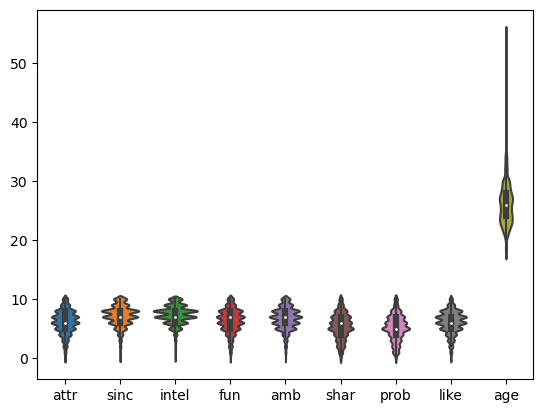

In [278]:
sns.violinplot(df)

<AxesSubplot: >

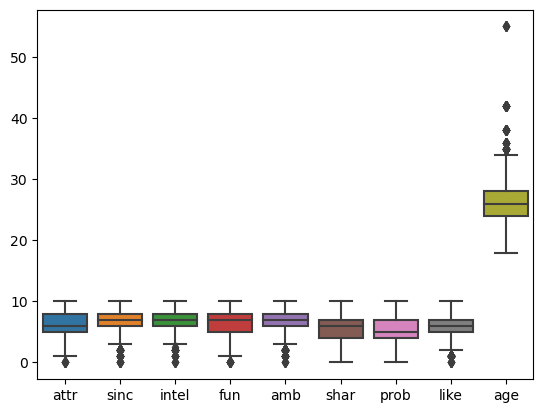

In [279]:
sns.boxplot(df)

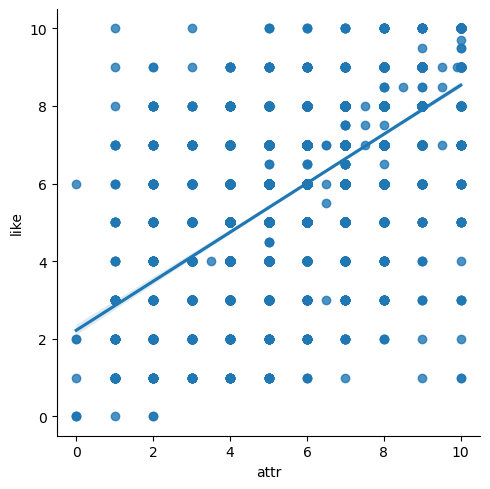

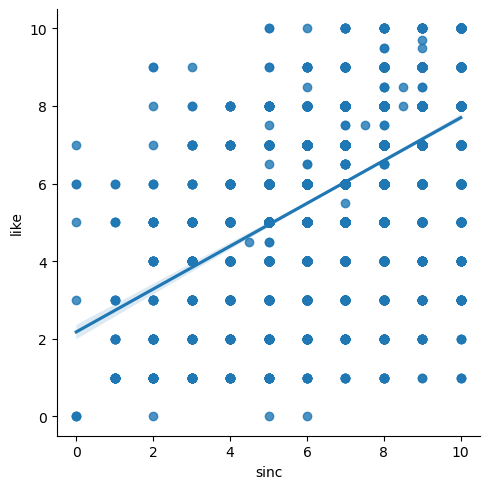

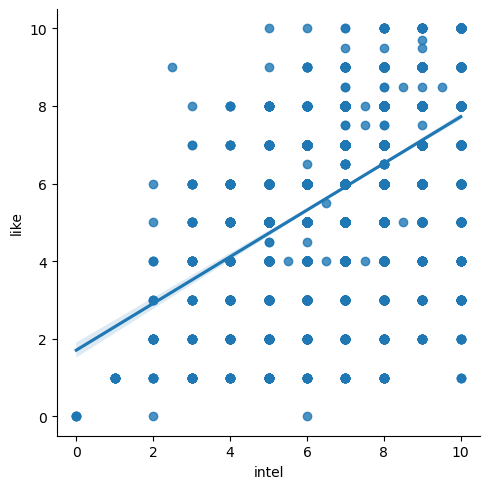

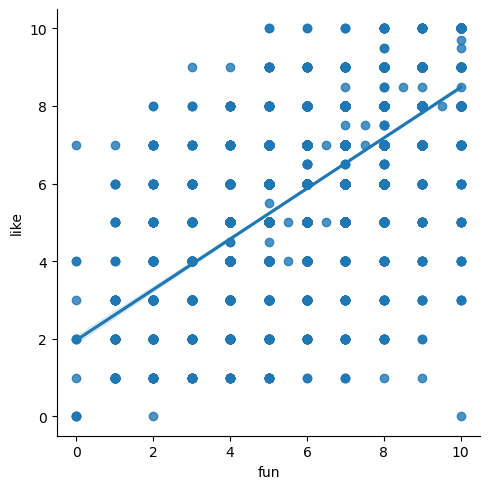

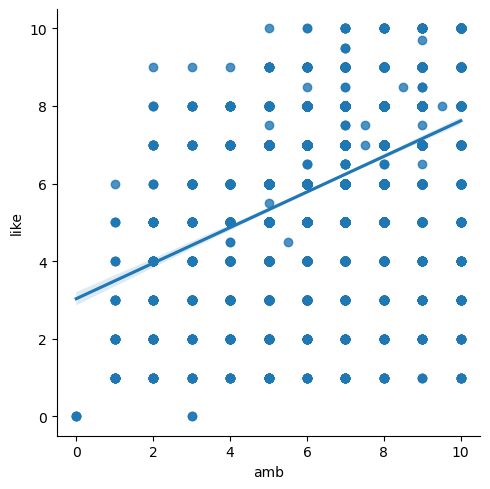

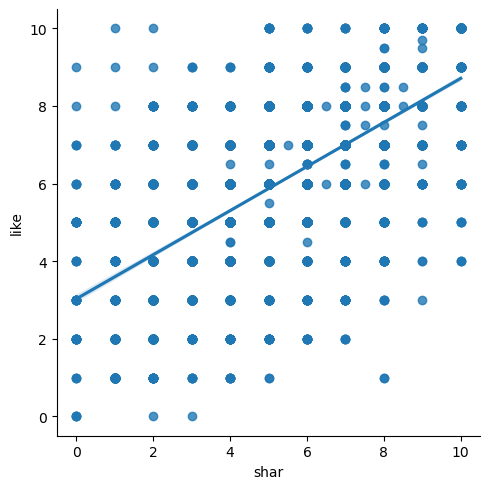

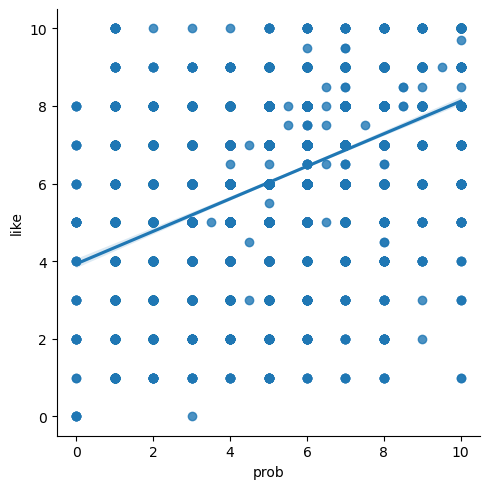

In [280]:
plt1 = sns.lmplot(df, y='like', x='attr')
plt2 = sns.lmplot(df, y='like', x='sinc')
plt3 = sns.lmplot(df, y='like', x='intel')
plt4 = sns.lmplot(df, y='like', x='fun')
plt5 = sns.lmplot(df, y='like', x='amb')
plt6 = sns.lmplot(df, y='like', x='shar')
plt7 = sns.lmplot(df, y='like', x='prob')


### Relationships

In [281]:
# inspect correlation between outcome and possible predictors
corr = df.corr()
corr['like'].sort_values(ascending=False)

like     1.000000
fun      0.688160
attr     0.666656
shar     0.659300
sinc     0.521294
intel    0.506557
prob     0.485809
amb      0.445592
age     -0.000553
Name: like, dtype: float64

In [282]:
corr.style.background_gradient(cmap='Blues')

,attr,sinc,intel,fun,amb,shar,prob,like,age
attr,1.000000,0.404977,0.385424,0.588031,0.356295,0.484558,0.277677,0.666656,0.014199
sinc,0.404977,1.000000,0.666471,0.508834,0.463241,0.398298,0.333310,0.521294,-0.012008
intel,0.385424,0.666471,1.000000,0.500007,0.627932,0.402560,0.280308,0.506557,-0.011917
fun,0.588031,0.508834,0.500007,1.000000,0.495026,0.615054,0.391965,0.688160,-0.016388
amb,0.356295,0.463241,0.627932,0.495026,1.000000,0.435125,0.282169,0.445592,-0.036786
shar,0.484558,0.398298,0.402560,0.615054,0.435125,1.000000,0.476802,0.659300,0.007673
prob,0.277677,0.333310,0.280308,0.391965,0.282169,0.476802,1.000000,0.485809,-0.003389
like,0.666656,0.521294,0.506557,0.688160,0.445592,0.659300,0.485809,1.000000,-0.000553
age,0.014199,-0.012008,-0.011917,-0.016388,-0.036786,0.007673,-0.003389,-0.000553,1.000000


## Model

### Select model

In [283]:
# select the linear regression model
reg = LinearRegression()

### Training and validation

In [284]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,1.064211
2,1.084162
3,1.137490
4,1.138539
5,1.078173


In [285]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [286]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,1.100515,0.034991,1.064211,1.078173,1.084162,1.13749,1.138539


### Fit model

In [287]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [288]:
# intercept
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )

# make a slope table
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)

# combine estimates of intercept and slopes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 3)

,Name,Coefficient
0,Intercept,-0.246
1,attr,0.313
2,sinc,0.089
3,intel,0.110
4,fun,0.199
5,amb,-0.019
6,shar,0.207
7,prob,0.134


### Evaluation on test set

In [289]:
# obtain predictions
y_pred = reg.predict(X_test)

In [290]:
mean_squared_error(y_test, y_pred).round(3)

1.187

In [291]:
importance = np.abs(reg.coef_)

df_imp = pd.DataFrame({"coeff": importance, 
                       "name": features})
df_imp

,coeff,name
0,0.312675,attr
1,0.089391,sinc
2,0.110345,intel
3,0.199359,fun
4,0.019322,amb
5,0.206884,shar
6,0.134364,prob


In [292]:
alt.Chart(df_imp).mark_bar().encode(
    x="coeff",
    y=alt.Y("name", sort='-x')
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions